**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 1](#toc1_)    
  - [Summarized Table of Contents](#toc1_1_)    
  - [Before Starting](#toc1_2_)    
  - [Introduction](#toc1_3_)    
  - [**1. Data Preparation**](#toc1_4_)    
  - [**1.1 Load data**](#toc1_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_1_1_1_)    
    - [**1.2 Save data**](#toc1_5_2_)    
    - [**1.3 Exploratory data analysis (EDA)**](#toc1_5_3_)    
  - [**2. Feature engineering**](#toc1_6_)    
    - [Using Bag of Words](#toc1_6_1_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_6_1_1_1_)    
  - [**3. Model**](#toc1_7_)    
    - [**3.1 Decision Trees**](#toc1_7_1_)    
  - [**4. Results Evaluation**](#toc1_8_)    
        - [**>>> Exercise 3 (Take home):**](#toc1_8_1_1_1_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_8_1_1_2_)    
        - [**>>> Exercise 5 (Take home):**](#toc1_8_1_1_3_)    
  - [**5. Other things you can try**](#toc1_9_)    
  - [**6. Deep Learning**](#toc1_10_)    
    - [**6.1 Prepare data (X, y)**](#toc1_10_1_)    
    - [**6.2 Deal with categorical label (y)**](#toc1_10_2_)    
    - [**6.3 Build model**](#toc1_10_3_)    
    - [**6.4 Train**](#toc1_10_4_)    
    - [**6.5 Predict on testing data**](#toc1_10_5_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_10_5_1_1_)    
    - [Note](#toc1_10_6_)    
    - [More Information for your reference](#toc1_10_7_)    
  - [**7. Word2Vector**](#toc1_11_)    
    - [**7.1 Prepare training corpus**](#toc1_11_1_)    
    - [**7.2 Training our model**](#toc1_11_2_)    
    - [**7.3 Generating word vector (embeddings)**](#toc1_11_3_)    
    - [**7.4 Using a pre-trained w2v model**](#toc1_11_4_)    
      - [(1) Download model by yourself](#toc1_11_4_1_)    
      - [(2) Using gensim api](#toc1_11_4_2_)    
    - [**7.5 king + woman - man = ?**](#toc1_11_5_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_11_5_1_1_)    
  - [**8. Clustering: k-means**](#toc1_12_)    
      - [Basic concept](#toc1_12_1_1_)    
  - [**9. High-dimension Visualization: t-SNE and UMAP**](#toc1_13_)    
    - [**9.1 Prepare visualizing target**](#toc1_13_1_)    
    - [**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc1_13_2_)    
        - [**>>> Exercise 8 (Take home):**](#toc1_13_2_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 1](#toc0_)
In this lab's phase 1 session we will focus on the use of Neural Word Embeddings

## <a id='toc1_1_'></a>[Summarized Table of Contents](#toc0_)
- **Phase 1:**
1. Data preparation
2. Feature engineering
3. Model
4. Results evaluation
5. Other things you could try
6. Deep Learning
7. Word to Vector
8. Clustering
9. High-dimension Visualization


## <a id='toc1_2_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_3_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_4_'></a>[**1. Data Preparation**](#toc0_)

Before beggining the lab, please make sure to download the [Google News Dataset](https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit) and place it in a folder named "GoogleNews" in the same directory as this file.

---
## <a id='toc1_5_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
##### <a id='toc1_5_1_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Train shape: (3613, 9850)
Test shape: (347, 9850)


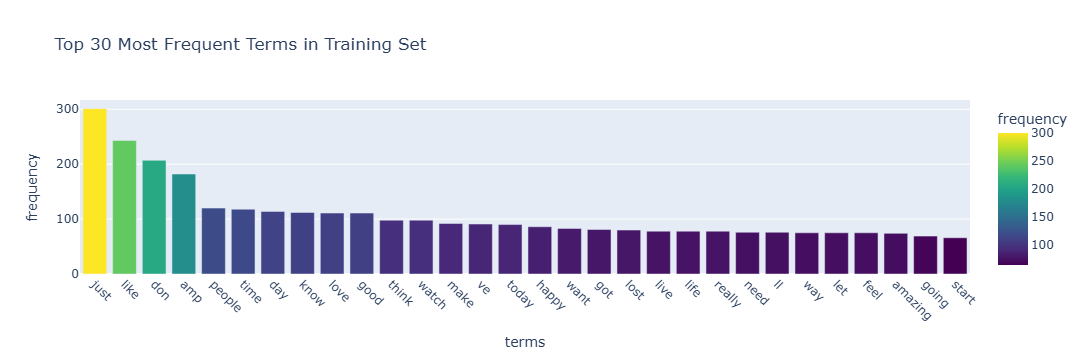

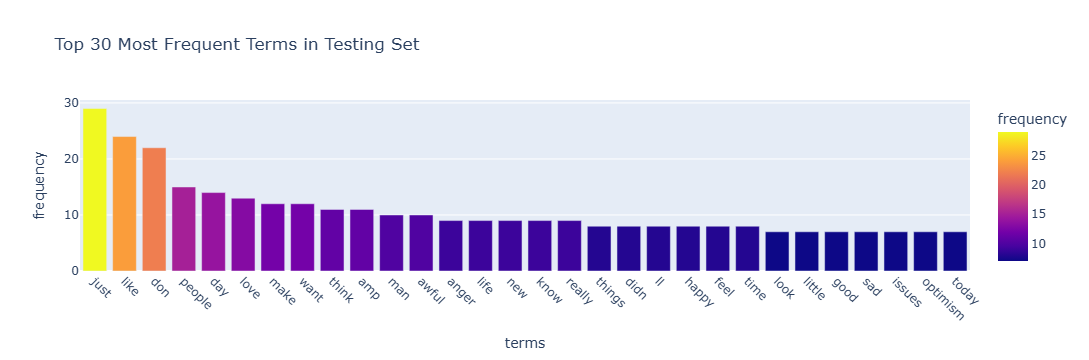

In [11]:
# Answer here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')


# 使用 lambda + word_tokenize
# 其實可以不用新增unigram
train_df["unigrams"] = train_df["text"].apply(lambda x: word_tokenize(str(x).lower()))
train_df[["text", "unigrams"]].head(3)



count_vect = CountVectorizer(stop_words='english')  # 去除英文停用詞
train_counts = count_vect.fit_transform(train_df['text'])
test_counts = count_vect.transform(test_df['text'])

print("Train shape:", train_counts.shape)
print("Test shape:", test_counts.shape)

# 把詞頻加總（統計整個訓練集中各詞的出現次數）
term_frequencies_train = np.asarray(train_counts.sum(axis=0)).flatten()
term_frequencies_test  = np.asarray(test_counts.sum(axis=0)).flatten()

# 取得詞彙表
vocab = count_vect.get_feature_names_out()

# 建立 DataFrame
freq_df_train = pd.DataFrame({'terms': vocab, 'frequency': term_frequencies_train})
freq_df_test  = pd.DataFrame({'terms': vocab, 'frequency': term_frequencies_test})

# 取前 30 高頻詞
top30_train = freq_df_train.sort_values(by='frequency', ascending=False).head(30)
top30_test  = freq_df_test.sort_values(by='frequency', ascending=False).head(30)

# 畫出訓練集詞頻圖
fig_train = px.bar(
    top30_train,
    x='terms',
    y='frequency',
    title='Top 30 Most Frequent Terms in Training Set',
    color='frequency',
    color_continuous_scale='Viridis'
)
fig_train.update_layout(xaxis_tickangle=45)
fig_train.show()

# 畫出測試集詞頻圖
fig_test = px.bar(
    top30_test,
    x='terms',
    y='frequency',
    title='Top 30 Most Frequent Terms in Testing Set',
    color='frequency',
    color_continuous_scale='Plasma'
)
fig_test.update_layout(xaxis_tickangle=45)
fig_test.show()


---
### <a id='toc1_5_2_'></a>[**1.2 Save data**](#toc0_)

We will save our data in Pickle format. The pickle module implements binary protocols for serializing and de-serializing a Python object structure.   
  
Some advantages for using pickle structure:  
* Because it stores the attribute type, it's more convenient for cross-platform use.  
* When your data is huge, it could use less space to store also consume less loading time.   

In [12]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [13]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
### <a id='toc1_5_3_'></a>[**1.3 Exploratory data analysis (EDA)**](#toc0_)

Again, before getting our hands dirty, we need to explore a little bit and understand the data we're dealing with.

In [6]:
# group to find distribution
train_df.groupby(['emotion']).count()['text']

emotion
anger       857
fear       1147
joy         823
sadness     786
Name: text, dtype: int64

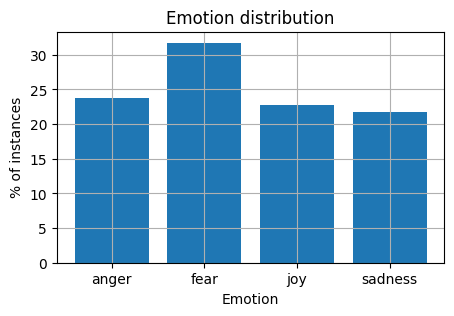

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train_df['emotion'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

---

## <a id='toc1_6_'></a>[**2. Feature engineering**](#toc0_)
### <a id='toc1_6_1_'></a>[Using Bag of Words](#toc0_)
Using scikit-learn ```CountVectorizer``` perform word frequency and use these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
# build analyzers (bag-of-words)
BOW_vectorizer = CountVectorizer() 

In [11]:
# 1. Learn a vocabulary dictionary of all tokens in the raw documents.
BOW_vectorizer.fit(train_df['text'])

# 2. Transform documents to document-term matrix.
train_data_BOW_features = BOW_vectorizer.transform(train_df['text'])
test_data_BOW_features = BOW_vectorizer.transform(test_df['text'])

In [13]:
# check the result
train_data_BOW_features

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 51467 stored elements and shape (3613, 10115)>

In [14]:
type(train_data_BOW_features)

scipy.sparse._csr.csr_matrix

In [15]:
# add .toarray() to show
train_data_BOW_features.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(3613, 10115))

In [16]:
# check the dimension
train_data_BOW_features.shape

(3613, 10115)

In [17]:
# observe some feature names
feature_names = BOW_vectorizer.get_feature_names_out()
feature_names[100:110]

array(['2k17', '2much', '2nd', '30', '300', '301', '30am', '30pm', '30s',
       '31'], dtype=object)

The embedding is done. We can technically feed this into our model. However, depending on the embedding technique you use and your model, your accuracy might not be as high, because:

* curse of dimensionality  (we have 10,115 dimension now)
* some important features are ignored (for example, some models using emoticons yeld better performance than counterparts)

In [24]:
"😂" in feature_names

False

Let's try using another tokenizer below.

In [18]:
import nltk

# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['text'])

train_data_BOW_features_500 = BOW_500.transform(train_df['text'])

## check dimension
train_data_BOW_features_500.shape

(3613, 500)

In [26]:
train_data_BOW_features_500.toarray()

array([[0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [2, 4, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]], shape=(3613, 500))

In [19]:
# observe some feature names
feature_names_500 = BOW_500.get_feature_names_out()
feature_names_500[100:110]

array(['change', 'cheer', 'cheerful', 'cheering', 'cheery', 'class',
       'come', 'comes', 'could', 'country'], dtype=object)

In [28]:
"😂" in feature_names_500

True

---
##### <a id='toc1_6_1_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [29]:
# Answer here
# Answer here
from sklearn.feature_extraction.text import TfidfVectorizer

# 建立 TF-IDF Vectorizer（限制最多 1000 個詞）
tfidf_vect = TfidfVectorizer(stop_words='english', max_features=1000)

# 用訓練集學習並轉換
tfidf_train = tfidf_vect.fit_transform(train_df['text'])

# 顯示矩陣維度
print("TF-IDF shape:", tfidf_train.shape)

# 取出 feature 名稱
feature_names_1000 = tfidf_vect.get_feature_names_out()

# 顯示第 [100:110] 的詞
print(feature_names_1000[100:110])


TF-IDF shape: (3613, 1000)
['boiling' 'book' 'boss' 'boy' 'break' 'breakfast' 'breezy' 'bright'
 'bring' 'bringing']


In [ ]:
#CountVectorizer是詞出現的次數，表示單純出現次數，常見詞會被強調
#TfidfVectorizer是詞的 TF × IDF 權重，會考慮詞的重要性，常見字（like, the, and）被壓低

---
## <a id='toc1_7_'></a>[**3. Model**](#toc0_)
### <a id='toc1_7_1_'></a>[**3.1 Decision Trees**](#toc0_)
Using scikit-learn ```DecisionTreeClassifier``` performs word frequency and uses these as features to train a model.  
http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

# for a classificaiton problem, you need to provide both training & testing data
#只取500個比較重要的權重
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## take a look at data dimension is a good habit  :)
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [31]:
## build DecisionTree model
#這個模組裡面就包含了所有決策樹的權重等等的
DT_model = DecisionTreeClassifier(random_state=1)

## training!
DT_model = DT_model.fit(X_train, y_train)

## predict!
y_train_pred = DT_model.predict(X_train)
y_test_pred = DT_model.predict(X_test)

## so we get the pred result
y_test_pred[:10]

array(['fear', 'sadness', 'fear', 'anger', 'sadness', 'sadness', 'joy',
       'anger', 'fear', 'joy'], dtype=object)

---
## <a id='toc1_8_'></a>[**4. Results Evaluation**](#toc0_)

Now we will check the results of our model's performance

In [32]:
## accuracy
from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))


training accuracy: 0.99
testing accuracy: 0.65


In [33]:
## precision, recall, f1-score,
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.64      0.65      0.65        84
        fear       0.66      0.68      0.67       110
         joy       0.67      0.67      0.67        79
     sadness       0.62      0.58      0.60        74

    accuracy                           0.65       347
   macro avg       0.65      0.65      0.65       347
weighted avg       0.65      0.65      0.65       347



In [36]:
## check by confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 17  7  5]
 [14 75  9 12]
 [ 8  9 53  9]
 [ 9 12 10 43]]


In [37]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

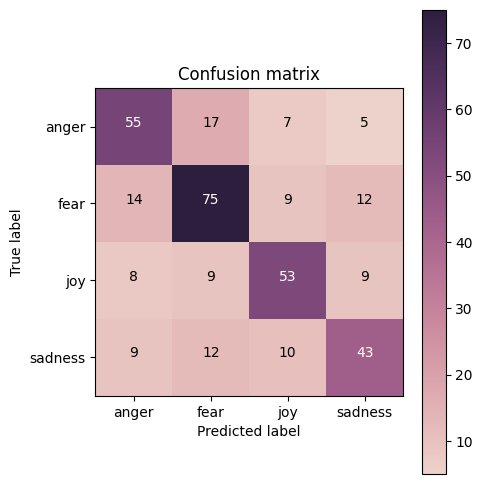

In [38]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

---
##### <a id='toc1_8_1_1_1_'></a>[**>>> Exercise 3 (Take home):**](#toc0_)
Can you interpret the results above? What do they mean?

In [39]:
# Answer here
#X軸表示預測的次數，Y軸表示實際值
#對角線的數字表示有幾筆有正確的預測到，比如說有75筆的fear有正確猜測到(預測值=實際值)
#其餘的表示猜錯的部分，可見fear和anger比較容易混淆，猜錯的次數較多

---
##### <a id='toc1_8_1_1_2_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Training Accuracy: 0.7907556047605868
Testing Accuracy: 0.6974063400576369

Classification Report (Testing Set):
              precision    recall  f1-score   support

       anger       0.64      0.67      0.65        84
        fear       0.73      0.77      0.75       110
         joy       0.77      0.70      0.73        79
     sadness       0.63      0.62      0.63        74

    accuracy                           0.70       347
   macro avg       0.70      0.69      0.69       347
weighted avg       0.70      0.70      0.70       347



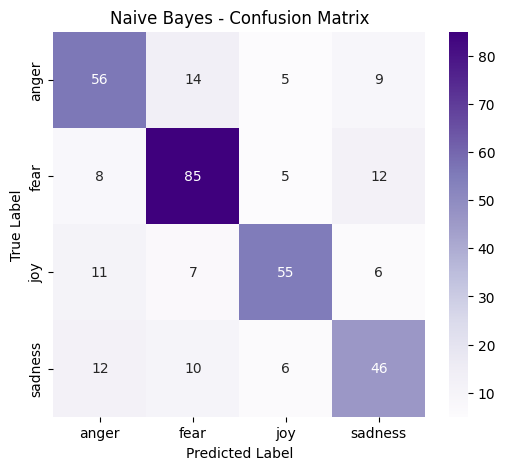

In [40]:
# Answer here
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Naive Bayes 模型
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)

# 預測
y_pred_train = NB_model.predict(X_train)
y_pred_test = NB_model.predict(X_test)

# 準確率
print("Training Accuracy:", accuracy_score(y_train, y_pred_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_test))

# 分類報告
print("\nClassification Report (Testing Set):")
print(classification_report(y_test, y_pred_test))

# 混淆矩陣(就是TP.FP那些)
cm = confusion_matrix(y_test, y_pred_test, labels=NB_model.classes_)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', 
            xticklabels=NB_model.classes_, 
            yticklabels=NB_model.classes_)
plt.title("Naive Bayes - Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


---
##### <a id='toc1_8_1_1_3_'></a>[**>>> Exercise 5 (Take home):**](#toc0_)

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

In [41]:
# Answer here
# Naive Bayes是計算每個字的機率，而且會考量字的貢獻和權重，適合這種高維度稀疏矩陣的資料集
# 決策樹是找一個點來切分資料，所以比較沒有關連性，也不會考慮整體的分布性，所以一旦樣本資料少，就會容易over-fitting


---

## <a id='toc1_9_'></a>[**5. Other things you can try**](#toc0_)

Thus, there are several things you can try that will affect your results. In order to yield better results, you can experiment by: 
- Trying different features (Feature engineering)e.g Word2Vec, PCA, LDA, FastText, Clustering
- Trying different models
- Analyzing your results and interpret them to improve your feature engineering/model building process
- Iterate through the steps above until finding a satisfying result

Remember that you should also consider the task at hand and the model you'll feed the data to. 

---
## <a id='toc1_10_'></a>[**6. Deep Learning**](#toc0_)

We use [Keras](https://keras.io/) to be our deep learning framework, and follow the [Model (functional API)](https://keras.io/models/model/) to build a Deep Neural Network (DNN) model. Keras runs with Tensorflow in the backend. It's a nice abstraction to start working with NN models. 

Because Deep Learning is a 1-semester course, we can't talk about each detail about it in the lab session. Here, we only provide a simple template about how to build & run a DL model successfully. You can follow this template to design your model.

We will begin by building a fully connected network, which looks like this:

![pic1.png](./pics/pic1.png)

(source: https://github.com/drewnoff/spark-notebook-ml-labs/tree/master/labs/DLFramework)


---
### <a id='toc1_10_1_'></a>[**6.1 Prepare data (X, y)**](#toc0_)

In [20]:
import keras
#高階神經網路 API（High-level API）用來快速建立神經網路模型

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [21]:
BOW_500.transform(test_df['text'])

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 4095 stored elements and shape (347, 500)>

---
### <a id='toc1_10_2_'></a>[**6.2 Deal with categorical label (y)**](#toc0_)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [22]:
# deal with label (string -> one-hot)
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 1109     fear
2440      joy
184     anger
1929     fear
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


In [23]:
y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)




## After convert
y_train[0:4]:
 [[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


In [ ]:
#轉成
#anger → [1, 0, 0, 0]
#fear  → [0, 1, 0, 0]
#joy   → [0, 0, 1, 0]
#sadness → [0, 0, 0, 1]
#因為模型只能理解數字不能理解字串

---
### <a id='toc1_10_3_'></a>[**6.3 Build model**](#toc0_)

In [ ]:
#shape[1]在矩陣裡，0表示行，1表示列
#output是4，因為有4個情緒

In [24]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


![pic2.png](./pics/pic2.png)

In [25]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape         ┃     Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━┩
│ input_layer (InputLayer)    │ (None, 500)          │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense (Dense)               │ (None, 64)           │      32,064 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ re_lu (ReLU)                │ (None, 64)           │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_1 (Dense)             │ (None, 64)           │       4,160 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ re_lu_1 (ReLU)              │ (None, 64)           │           0 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ dense_2 (Dense)             │ (None, 4)            │         260 │
├─────────────────────────────┼──────────────────────┼─────────────┤
│ softmax (Softmax)           │ (None, 4)            │           0 │
└─────────────────────────────┴──────────────────────┴─────────────┘

 Total params: 36,484 (142.52 KB)

 Trainable params: 36,484 (142.52 KB)

 Non-trainable params: 0 (0.00 B)

---
### <a id='toc1_10_4_'></a>[**6.4 Train**](#toc0_)

In [ ]:
#CSVLogger自動把每一個 epoch 的訓練結果（loss、accuracy、val_loss、val_accuracy 等）寫入一個 .csv 檔案中，方便後續分析、畫圖、比對模型表現

In [26]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3737 - loss: 1.3269 - val_accuracy: 0.4207 - val_loss: 1.2809
Epoch 2/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6380 - loss: 1.0003 - val_accuracy: 0.6427 - val_loss: 0.9602
Epoch 3/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7985 - loss: 0.5868 - val_accuracy: 0.6830 - val_loss: 0.8156
Epoch 4/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 0.4169 - val_accuracy: 0.6801 - val_loss: 0.8267
Epoch 5/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8851 - loss: 0.3240 - val_accuracy: 0.6571 - val_loss: 0.9156
Epoch 6/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9048 - loss: 0.2660 - val_accuracy: 0.6772 - val_loss: 0.9686
Epoch 7/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9278 - loss: 0.2196 - val_accuracy: 0.6686 - val_loss: 1.0207
Epoch 8/25
113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.1813 - val_accuracy: 0.

---
### <a id='toc1_10_5_'></a>[**6.5 Predict on testing data**](#toc0_)

In [27]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


array([[3.7752517e-04, 2.4377648e-02, 9.7446311e-01, 7.8176812e-04],
       [9.9999952e-01, 2.0971902e-07, 2.7919219e-07, 2.0779140e-08],
       [1.2917244e-03, 1.0024630e-02, 9.8847824e-01, 2.0544049e-04],
       [6.4561032e-03, 7.4611125e-06, 3.7638802e-04, 9.9316001e-01],
       [3.7456521e-05, 9.8597312e-01, 3.1289426e-04, 1.3676464e-02]],
      dtype=float32)

In [ ]:
#這是一個 2D 陣列，形狀為 (347, 4)
#→ 每一列對應一筆測試資料（347 筆）
#→ 每一行對應一個類別（4 個情緒），數值代表機率
#raw score→softmax
#anger:  0.2→ 0.001
#fear:   2.0→ 0.02
#joy:    5.5→ 0.97
#sadness:1.00→0.009
#下面是對應的最高機率→對回原本的label

In [30]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['joy', 'anger', 'joy', 'sadness', 'fear'], dtype=object)

In [52]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [53]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.364240,1.332003,0.400576,1.291524
1,1,0.642402,0.983484,0.654179,0.958391
2,2,0.786327,0.577574,0.691643,0.816199
3,3,0.843897,0.421699,0.691643,0.808819
4,4,0.887905,0.321076,0.682997,0.856154
5,5,0.895655,0.273217,0.697406,0.940227
6,6,0.923886,0.227091,0.688761,0.950607
7,7,0.935234,0.186867,0.680115,1.026870
8,8,0.950733,0.158052,0.668588,1.077351
9,9,0.958760,0.141866,0.680115,1.115178


---
##### <a id='toc1_10_5_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

![pic3.png](./pics/pic3.png)  ![pic4.png](./pics/pic4.png)


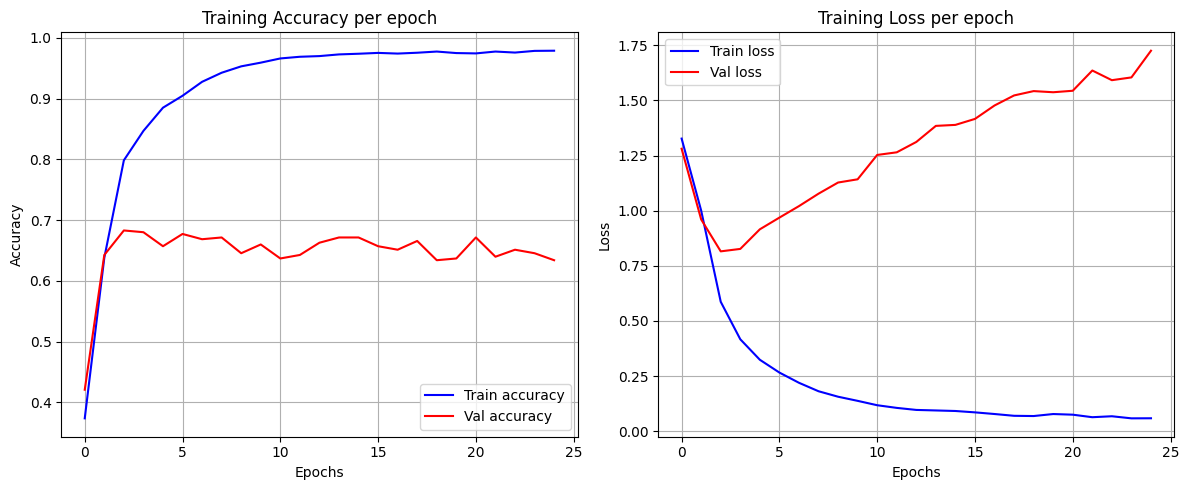

In [31]:
# Answer here

import matplotlib.pyplot as plt
import pandas as pd

# 讀取 CSV 檔案（CSVLogger 存過）
training_log = pd.read_csv('logs/training_log.csv')

# 建立畫布（1 列 2 欄）
plt.figure(figsize=(12,5))

# 左圖：Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_log['epoch'], training_log['accuracy'], 'b-', label='Train accuracy')
plt.plot(training_log['epoch'], training_log['val_accuracy'], 'r-', label='Val accuracy')
plt.title('Training Accuracy per epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# 右圖：Loss
plt.subplot(1, 2, 2)
plt.plot(training_log['epoch'], training_log['loss'], 'b-', label='Train loss')
plt.plot(training_log['epoch'], training_log['val_loss'], 'r-', label='Val loss')
plt.title('Training Loss per epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [32]:
#Train 的Aaccuracy&loss都表現很好，表示模型的學習和背誦良好
#Val 的 Aaccuracy 到0.6後開始停滯，loss也逐漸上升，表是在測試的結果越來越糟
#造成這種現場可能是模型學習太好，有over-fitting的現象，導致其實他的預測結果是不好的

---

### <a id='toc1_10_6_'></a>[Note](#toc0_)

If you don't have a GPU (level is higher than GTX 1060) or you are not good at setting lots of things about computer, we recommend you to use the [kaggle kernel](https://www.kaggle.com/kernels) to do deep learning model training. They have already installed all the librarys and provided free GPU for you to use.

Note however that you will only be able to run a kernel for 6 hours. After 6 hours of inactivity, your Kaggle kernel will shut down (meaning if your model takes more than 6 hours to train, you can't train it at once).


### <a id='toc1_10_7_'></a>[More Information for your reference](#toc0_)

* Keras document: https://keras.io/
* Keras GitHub example: https://github.com/keras-team/keras/tree/master/examples
* CS229: Machine Learning: http://cs229.stanford.edu/syllabus.html
* Deep Learning cheatsheet: https://stanford.edu/~shervine/teaching/cs-229/cheatsheet-deep-learning
* If you want to try TensorFlow or PyTorch: https://pytorch.org/tutorials/
https://www.tensorflow.org/tutorials/quickstart/beginner

---
## <a id='toc1_11_'></a>[**7. Word2Vector**](#toc0_)

We will introduce how to use `gensim` to train your word2vec model and how to load a pre-trained model.

https://radimrehurek.com/gensim/index.html

---
### <a id='toc1_11_1_'></a>[**7.1 Prepare training corpus**](#toc0_)

In [ ]:
#CountVectorizer只有出現次數
#TF-IDF只有重要程度
#gensim.Word2Ve有上下文關聯

In [35]:
## check library
import gensim

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

# # if you want to see the training messages, you can use it
# import logging
# logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
1109,20252,@politico If they say the words radical Islami...,"[@, politico, If, they, say, the, words, radic..."
2440,30436,"repentance, and trusting in Christ. It is lowl...","[repentance, ,, and, trusting, in, Christ, ., ..."
184,10184,"@Daniel_Sankey @hayleyp79 Haha.... Actually, a...","[@, Daniel_Sankey, @, hayleyp79, Haha, ...., A..."
1929,21072,It's a good day at work when you get to shake ...,"[It, 's, a, good, day, at, work, when, you, ge..."
1915,21058,Anyone else find @Microsoft 'anniversary windo...,"[Anyone, else, find, @, Microsoft, 'anniversar..."


In [36]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['@', 'politico', 'If', 'they', 'say', 'the', 'words', 'radical', 'Islamic', 'terrorist', ',', 'will', 'that', 'somehow', 'make', 'the', 'terror', 'groups', 'drop', 'their', 'weapons', '?']),
       list(['repentance', ',', 'and', 'trusting', 'in', 'Christ', '.', 'It', 'is', 'lowly', 'and', 'painful', ',', 'but', 'it', 'is', 'also', 'joyous', ',', 'peaceful', ',', 'and', 'absolutely', 'glorious', '.', '(', '2/2', ')']),
       list(['@', 'Daniel_Sankey', '@', 'hayleyp79', 'Haha', '....', 'Actually', ',', 'after', 'the', 'Doggies', 'I', "'m", 'barracking', 'for', 'Anyone', 'But', 'GWS', '!', '#', 'bitter'])],
      dtype=object)

---
### <a id='toc1_11_2_'></a>[**7.2 Training our model**](#toc0_)

You can try to train your own model. More details: https://radimrehurek.com/gensim/models/word2vec.html

In [ ]:
#表示每個詞會被轉成一個 100 維的向量，越接近的畫向量距離越近
#window_size=5 上下五個字的關聯

In [37]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_epochs = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          vector_size=vector_dim, window=window_size, 
                          min_count=min_count, epochs=training_epochs)

![Imgur](https://i.imgur.com/Fca3MCs.png)

---
### <a id='toc1_11_3_'></a>[**7.3 Generating word vector (embeddings)**](#toc0_)

In [38]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.43213692,  0.39924222,  0.06559561, -0.03388174,  0.18691261,
       -1.395187  ,  0.18369474,  1.739466  , -0.27677748, -0.53889096,
       -0.02925463, -0.66956985, -0.5246104 ,  0.5511971 , -0.23480661,
       -0.20003162,  0.7380762 , -0.3114617 ,  0.24897647, -0.9640605 ,
        0.528384  ,  1.1050817 ,  0.7771959 , -0.03969358,  0.10375095,
        0.10872706, -0.40432963,  0.6499419 , -0.38114345, -0.0549162 ,
        0.13416855, -0.37226185,  0.45802805, -0.6494274 , -0.19710676,
        0.19557413,  0.17517816,  0.0278604 , -0.53924966, -0.53130364,
        0.04867133, -0.25708786, -0.19771467,  0.37506232,  0.54911894,
       -0.3951342 , -1.1251016 ,  0.04291636,  0.06605182,  0.22325262,
       -0.28731385, -0.5580645 , -0.14212261, -0.16017176, -0.25363985,
       -0.5462051 ,  0.30039287, -0.01071247, -0.1227119 ,  0.4513112 ,
        0.35582244, -0.2979331 ,  0.37156203,  0.22251323, -0.8634912 ,
        0.95065665, -0.02162772,  0.76303554, -1.129948  ,  0.61

In [39]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.wv.most_similar(word, topn=topn)

[('smile', 0.9141669273376465),
 ('Be', 0.9109658598899841),
 ('birthday', 0.9103366732597351),
 ('bday', 0.9077367186546326),
 ("'you", 0.9044809937477112),
 ('help', 0.9003385305404663),
 ('free', 0.8991142511367798),
 ('cats', 0.8928681015968323),
 ('Makes', 0.8919586539268494),
 ('cry', 0.8919251561164856)]

---
### <a id='toc1_11_4_'></a>[**7.4 Using a pre-trained w2v model**](#toc0_)

Instead of training your own model ,you can use a model that has already been trained. Here, we see 2 ways of doing that:


#### <a id='toc1_11_4_1_'></a>[(1) Download model by yourself](#toc0_)

Download from this link: [Kaggle | Google News Vectors](https://www.kaggle.com/datasets/didiersalazar/google-news-vectors)

Copy the data `GoogleNews-vectors-negative300.bin` into the following folder directory: `GoogleNews/`

source: [GoogleNews-vectors-negative300](https://code.google.com/archive/p/word2vec/)

more details: https://radimrehurek.com/gensim/models/keyedvectors.html

In [41]:
from gensim.models import KeyedVectors
# IMPORTANT: Please make sure that you have correctly downloaded the file and put it in the correct directory
## Note: this model is huge, this will take some time ...
model_path = "./GoogleNews/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

w2v_google_model.most_similar('happy', topn=10)

load ok


MemoryError: Unable to allocate 3.35 GiB for an array with shape (3000000, 300) and data type float32

#### <a id='toc1_11_4_2_'></a>[(2) Using gensim api](#toc0_)

Other pretrained models are available here: https://github.com/RaRe-Technologies/gensim-data

In [42]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

[================================------------------] 64.7% 67.8/104.8MB downloaded

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



[==================================================] 100.0% 104.8/104.8MB downloaded
load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183342933655),
 ('miss', 0.9164500832557678),
 ('hello', 0.9158351421356201),
 ('thanks', 0.915008544921875),
 ('merry', 0.9053249359130859),
 ('bless', 0.902732253074646),
 ('wish', 0.9013164043426514)]

---
### <a id='toc1_11_5_'></a>[**7.5 king + woman - man = ?**](#toc0_)

Let's run one of the most famous examples for Word2Vec and compute the similarity between these 3 words:

In [55]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118193507194519),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321839332581),
 ('kings', 0.5236844420433044),
 ('Queen_Consort', 0.5235945582389832),
 ('queens', 0.5181134343147278),
 ('sultan', 0.5098593831062317),
 ('monarchy', 0.5087411999702454)]

---
##### <a id='toc1_11_5_1_1_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?


In [43]:
# Answer here

# glove 模型
model = glove_twitter_25_model  # google news檔案太大跑不了，用twitter這個

# 範例句子
sentence = "I love happy music".lower().split()

# 收集每個詞的向量（若詞不存在於模型中則略過）
vectors = [model[word] for word in sentence if word in model.key_to_index]

# 取平均向量代表整句話
if len(vectors) > 0:
    sentence_vector = np.mean(vectors, axis=0)
else:
    sentence_vector = np.zeros(model.vector_size)

print("句子向量維度:", sentence_vector.shape)
print("句子向量內容(前10維):", sentence_vector[:10])


句子向量維度: (25,)
句子向量內容(前10維): [-0.5604      0.260107    0.327327   -0.04975775 -0.40232003 -0.218335
  1.91085     0.8670355  -0.74461246 -0.173195  ]


---
## <a id='toc1_12_'></a>[**8. Clustering: k-means**](#toc0_)

Here we introduce how to use `sklearn` to do the basic **unsupervised learning** approach, k-means.    

more details: http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html


#### <a id='toc1_12_1_1_'></a>[Basic concept](#toc0_)

![pic5.png](./pics/pic5.png)

(img source: https://towardsdatascience.com/k-means-clustering-identifying-f-r-i-e-n-d-s-in-the-world-of-strangers-695537505d)

In [44]:
# clustering target
target_list = ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']
print('target words: ', target_list)

# convert to word vector
X = [word2vec_model.wv[word] for word in target_list]

target words:  ['happy', 'fear', 'angry', 'car', 'teacher', 'computer']


In [45]:
from sklearn.cluster import KMeans

# we have to decide how many cluster (k) we want
k = 2

# k-means model
kmeans_model = KMeans(n_clusters=k)
kmeans_model.fit(X)

# cluster result
cluster_result = kmeans_model.labels_

# show
for i in range(len(target_list)):
    print('word: {} \t cluster: {}'.format(target_list[i], cluster_result[i]))

word: happy 	 cluster: 1
word: fear 	 cluster: 0
word: angry 	 cluster: 0
word: car 	 cluster: 0
word: teacher 	 cluster: 0
word: computer 	 cluster: 0


![pic6.png](./pics/pic6.png)

In [58]:
#check cluster membership
word = 'student'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([1])

In [59]:
#check cluster membership
word = 'sad'
word_vec = word2vec_model.wv[word]
kmeans_model.predict([word_vec])

array([0])

---
## <a id='toc1_13_'></a>[**9. High-dimension Visualization: t-SNE and UMAP**](#toc0_)

No matter if you use the Bag-of-words, TF-IDF, or Word2Vec, it's very hard to see the embedding result, because the dimension is larger than 3.  

In Lab 1, we already talked about PCA, t-SNE and UMAP. We can use PCA to reduce the dimension of our data, then visualize it. However, if you dig deeper into the result, you'd find it is insufficient.

Our aim will be to create a visualization similar to the one below with t-SNE:

![pic7.png](./pics/pic7.png)

source: https://www.fabian-keller.de/research/high-dimensional-data-visualization 

And also like this for UMAP:

![pic9.png](./pics/pic9.png)

source: https://umap-learn.readthedocs.io/en/latest/auto_examples/plot_mnist_example.html

t-SNE and UMAP reference:  
http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html 
https://umap-learn.readthedocs.io/en/latest/

---
### <a id='toc1_13_1_'></a>[**9.1 Prepare visualizing target**](#toc0_)

Let's prepare data lists like:
- happy words
- angry words
- data words
- mining words

In [60]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


---
### <a id='toc1_13_2_'></a>[**9.2 Plot using t-SNE and UMAP (2-dimension)**](#toc0_)

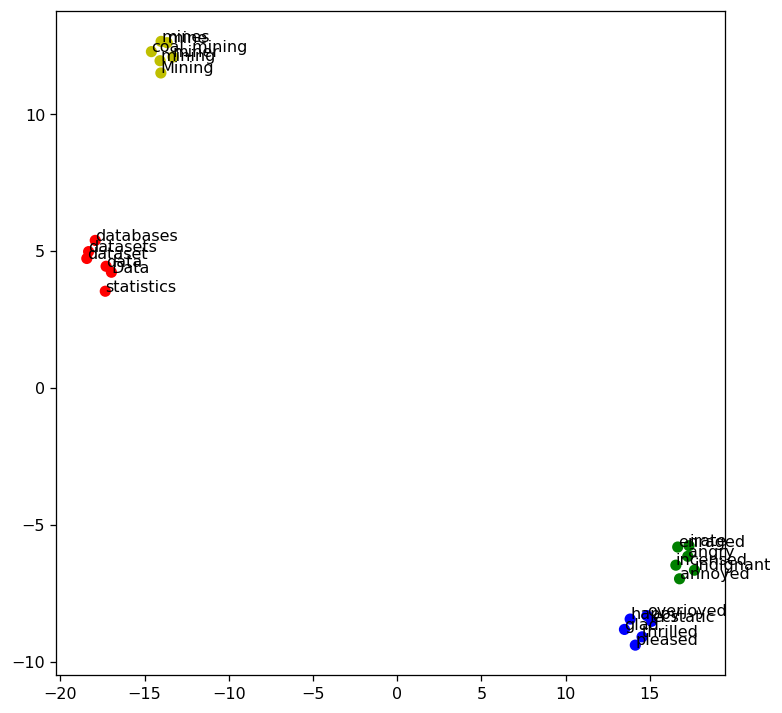

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

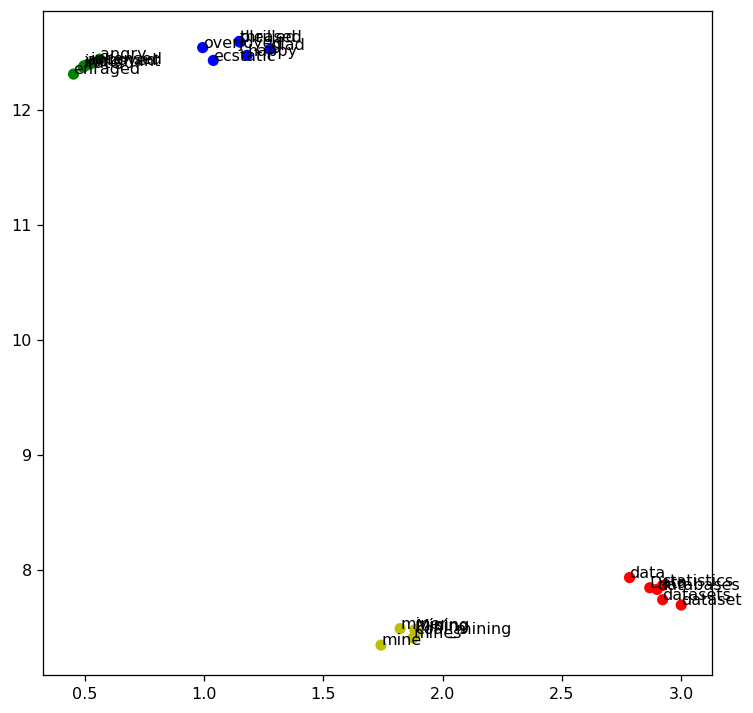

In [62]:
import matplotlib.pyplot as plt
import umap.umap_ as umap

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


In [53]:
#試試看用glove_twitter_25_model 
import matplotlib.pyplot as plt
import umap.umap_ as umap

word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]       

## glove_twitter_25_model 
model = glove_twitter_25_model 

target_words = happy_words + angry_words + data_words + mining_words

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## UMAP model
umap_model = umap.UMAP(n_components=2, metric='cosine', random_state=28)

## training
X_umap = umap_model.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_umap[:target_size, 0], X_umap[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_umap[:target_size, 0], X_umap[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()


MemoryError: Unable to allocate 3.35 GiB for an array with shape (3000000, 300) and data type float32

---
##### <a id='toc1_13_2_1_1_'></a>[**>>> Exercise 8 (Take home):**](#toc0_)

Generate a t-SNE and UMAP visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total). Compare the differences between both graphs.

Total words visualized: 60


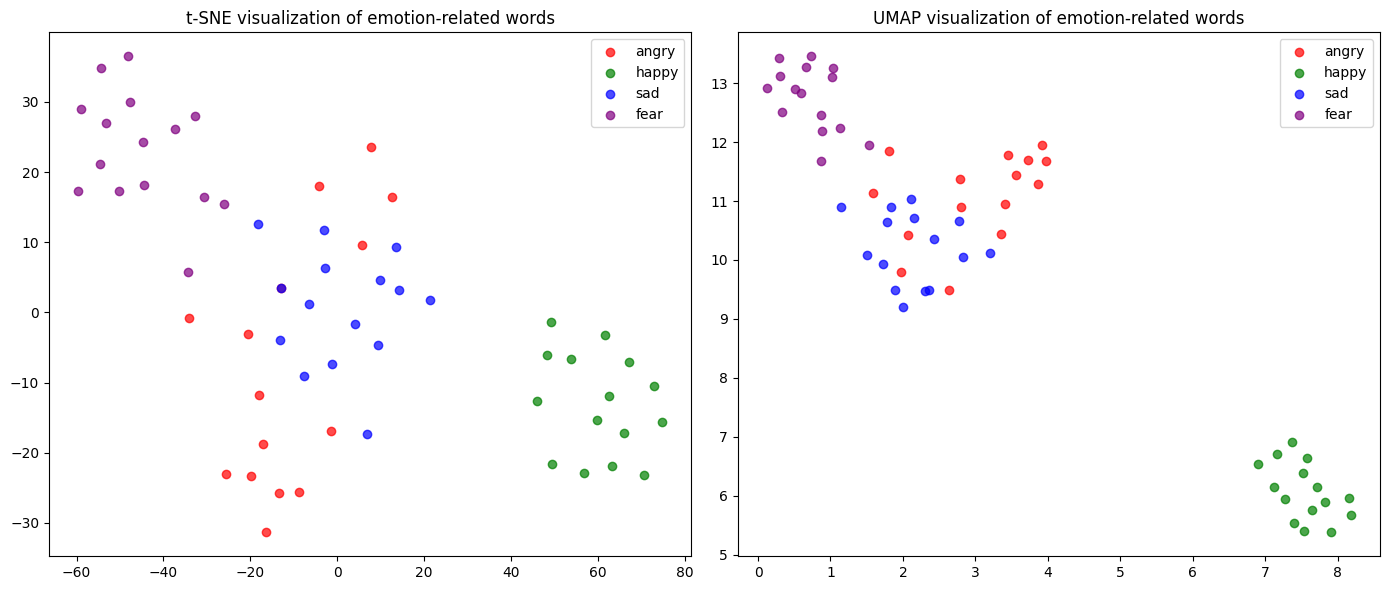

In [54]:
# Answer here

import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap.umap_ as umap
model = glove_twitter_25_model

# 選擇四個情緒詞
target_words = ["angry", "happy", "sad", "fear"]

# 找出每個情緒詞最相關的15個詞
similar_words = {}
for word in target_words:
    if word in model.key_to_index:
        similar_words[word] = [w for w, s in model.most_similar(word, topn=15)]

# 收集所有詞與對應向量
all_words = []
all_vectors = []
all_labels = []

for emotion, words in similar_words.items():
    for w in words:
        all_words.append(w)
        all_vectors.append(model[w])
        all_labels.append(emotion)

all_words = np.array(all_words)
all_vectors = np.array(all_vectors)

print(f"Total words visualized: {len(all_words)}")

# 建立降維模型
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
umap_reducer = umap.UMAP(n_components=2, random_state=42)

X_tsne = tsne.fit_transform(all_vectors)
X_umap = umap_reducer.fit_transform(all_vectors)

#  定義顏色映射
colors = {"angry": "red", "happy": "green", "sad": "blue", "fear": "purple"}

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# t-SNE 圖
for emo in target_words:
    idx = [i for i, e in enumerate(all_labels) if e == emo]
    axes[0].scatter(X_tsne[idx, 0], X_tsne[idx, 1], c=colors[emo], label=emo, alpha=0.7)
axes[0].set_title("t-SNE visualization of emotion-related words")
axes[0].legend()

# UMAP 圖
for emo in target_words:
    idx = [i for i, e in enumerate(all_labels) if e == emo]
    axes[1].scatter(X_umap[idx, 0], X_umap[idx, 1], c=colors[emo], label=emo, alpha=0.7)
axes[1].set_title("UMAP visualization of emotion-related words")
axes[1].legend()

plt.tight_layout()
plt.show()


---

In [55]:
#t-SNE 重視局部相似性，會讓相近的詞變得更緊密，但整體結構可能被壓縮或扭曲！
#UMAP各情緒群之間距離分布比較平滑、連續，不像 t-SNE 那樣完全分開。UMAP 通常比 t-SNE 更穩定速度更快，也更能捕捉「語意過渡區」。